In [1]:
## Decision Tree advanced template (this has been copied from linar regression.)

In [46]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
import pickle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score

In [47]:
from sklearn.preprocessing import OneHotEncoder
##### from sklearn.feature_selection import RFECV        ####(we don't need to do feature selection in decision tree 
######## as it does not effcet the model. However, if we have too many feature, we can still opt to do it.)


In [48]:
data_for_model=pickle.load(open(r"C:\Users\12176\Desktop\lab\Data science\5. Machine_learning\2. Datasets/abc_reg_modelling.p", "rb"))

In [49]:
data_for_model.head()

,customer_id,distance_from_store,gender,credit_score,customer_loyalty_score,toatl_sales_cost,num_items,transactions_id,product_area_id,average_basket_value
0,74,3.38,F,0.59,0.263,2563.71,297,44,5,58.266136
1,524,4.76,F,0.52,0.298,2996.02,357,49,5,61.143265
2,607,4.45,F,0.49,0.337,2853.82,350,49,5,58.241224
3,343,0.91,M,0.54,0.873,2388.31,272,54,5,44.227963
4,322,3.02,F,0.63,0.350,2401.64,278,50,5,48.032800


In [50]:
data_for_model.drop(["customer_id"], axis=1)

,distance_from_store,gender,credit_score,customer_loyalty_score,toatl_sales_cost,num_items,transactions_id,product_area_id,average_basket_value
0,3.38,F,0.59,0.263,2563.71,297,44,5,58.266136
1,4.76,F,0.52,0.298,2996.02,357,49,5,61.143265
2,4.45,F,0.49,0.337,2853.82,350,49,5,58.241224
3,0.91,M,0.54,0.873,2388.31,272,54,5,44.227963
4,3.02,F,0.63,0.350,2401.64,278,50,5,48.032800
...,...,...,...,...,...,...,...,...,...
862,2.14,M,0.64,0.564,3499.39,278,47,5,74.455106
865,4.38,F,0.50,0.321,3423.01,338,49,5,69.857347
866,2.36,F,0.63,0.587,3648.08,280,49,5,74.450612
868,0.21,M,0.47,0.972,3303.80,264,51,5,64.780392


In [51]:
data_for_model = shuffle(data_for_model, random_state=42)

In [52]:
data_for_model.isna().sum() ##not many missing values. we can just drop the rows


customer_id               0
distance_from_store       2
gender                    3
credit_score              2
customer_loyalty_score    0
toatl_sales_cost          0
num_items                 0
transactions_id           0
product_area_id           0
average_basket_value      0
dtype: int64

In [53]:
data_for_model.dropna(how="any", inplace =True)
data_for_model.isna().sum()

customer_id               0
distance_from_store       0
gender                    0
credit_score              0
customer_loyalty_score    0
toatl_sales_cost          0
num_items                 0
transactions_id           0
product_area_id           0
average_basket_value      0
dtype: int64

In [54]:
### deal with outliers ( we don't need to remove outliers in decision tree).
#### outlier_investigatoin=data_for_model.describe()
### outlier_investigatoin

In [118]:
### splitting dataset
X =data_for_model.drop(["customer_loyalty_score"], axis=1)
y=data_for_model["customer_loyalty_score"]
regressor=DecisionTreeRegressor(random_state=42, max_depth=4)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [119]:
## DEALING WITH CATEGORICAL VARIABLES   # we use only transform on test dataset

In [1]:
encoder= OneHotEncoder(sparse=False,drop= "first")
cat_vars=["gender"]
X_train_encoder=encoder.fit_transform(X_train[cat_vars])
X_test_encoder=encoder.transform(X_test[cat_vars])
feature_names= encoder.get_feature_names(cat_vars)

NameError: name 'OneHotEncoder' is not defined

In [121]:
## we have to do this for both X_train and X_test
X_train_encoder =pd.DataFrame(X_train_encoder, columns = feature_names)
X_train = pd.concat([X_train.reset_index(drop=True), X_train_encoder.reset_index(drop=True)],axis=1)
X_train.drop(cat_vars, axis =1, inplace=True)

In [122]:
X_test_encoder =pd.DataFrame(X_test_encoder, columns = feature_names)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_encoder.reset_index(drop=True)],axis=1)
X_test.drop(cat_vars, axis =1, inplace=True)

In [123]:
X_train.head()

,customer_id,distance_from_store,credit_score,toatl_sales_cost,num_items,transactions_id,product_area_id,average_basket_value,gender_M
0,697,0.04,0.67,1191.53,216,53,5,22.481698,1.0
1,701,2.04,0.64,1581.41,343,41,4,38.570976,0.0
2,832,2.24,0.63,1327.51,266,48,4,27.656458,0.0
3,696,1.72,0.59,2094.10,352,34,3,61.591176,1.0
4,588,0.24,0.53,1133.45,180,56,5,20.240179,1.0


In [124]:
## Model fitting
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [125]:
y_pred=regressor.predict(X_test)

In [126]:
r_squared=r2_score(y_test, y_pred)
r_squared

0.8503069736231792

In [127]:
## K fold cross validation
cv = KFold(n_splits =4, shuffle =True, random_state = 42)
cv_scores= cross_val_score(regressor, X_train, y_train, cv = cv, scoring = "r2")
cv_scores.mean()

0.8048584865261048

In [128]:
## adjusted R square
num_data_points, num_input_vars= X_test.shape
adjusted_R_square = 1 - (1 - r_squared) * (num_data_points - 1) /(num_data_points - num_input_vars -1)
print(adjusted_R_square)

0.8307817962696809


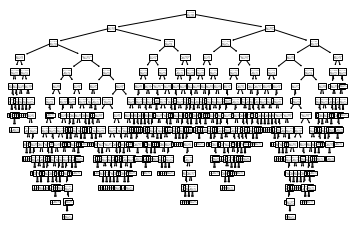

In [88]:
tree = plot_tree(regressor)

In [129]:
### Demonstration of overfitting
y_pred_train= regressor.predict(X_train)
r2_score(y_train, y_pred_train) ## issue here is R2 value is too good at training dataset and very less at test dataset. It's overfitting the data)

0.9070938894223688

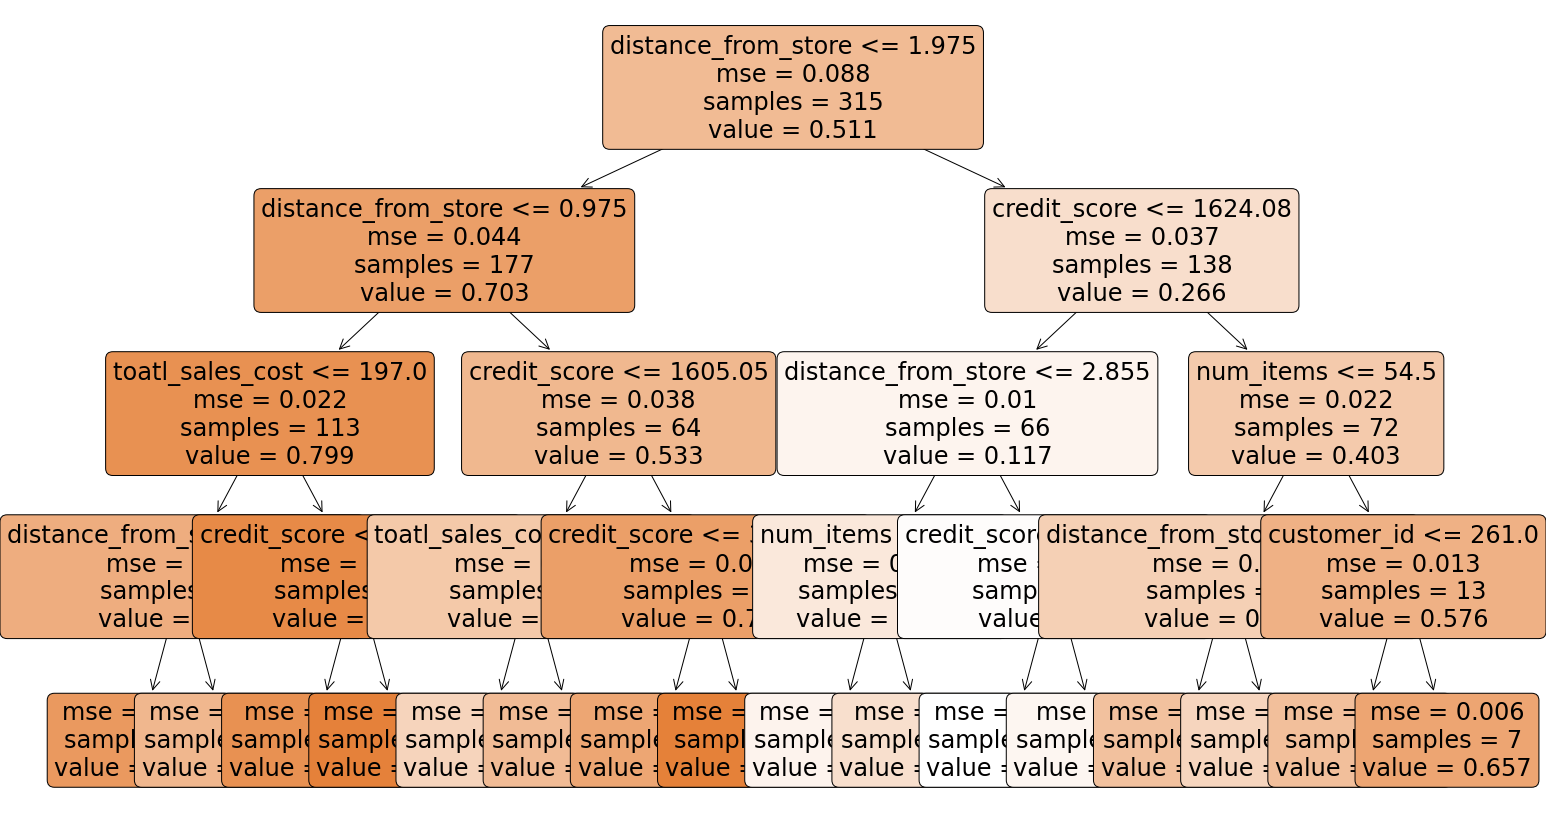

In [134]:
plt.figure(figsize=(25,15))
tree = plot_tree(regressor,
                feature_names=X.columns,
                filled=True,
                rounded=True,
                fontsize=24) ## too bad. almost fitting evrything ## afer changing max_depth it will fit good

In [102]:
### finding the best max depth for the decision tree model
max_depth=list(range(1,9))
accuracy_scores=[]

    
    

In [103]:
for depth in max_depth:
    regressor=DecisionTreeRegressor(max_depth=depth, random_state=42)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    accuracy=r2_score(y_pred, y_test)
    accuracy_scores.append(accuracy)

In [105]:
accuracy_scores

[0.09368912006885333,
 0.6506598019878381,
 0.811317086288073,
 0.8251759412170532,
 0.8564282309351227,
 0.8768196206807471,
 0.8857135153189548,
 0.8734008813395387]

In [108]:
max_accuracy=max(accuracy_scores)
max_accuracy_idx=accuracy_scores.index(max_accuracy)
optimal_depth=max_depth[max_accuracy_idx]

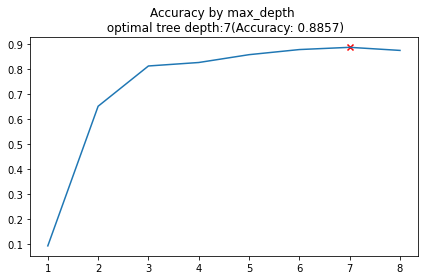

In [117]:
plt.plot(max_depth, accuracy_scores)
plt.scatter(optimal_depth, max_accuracy, marker="x", color="red")
plt.title(f"Accuracy by max_depth \n optimal tree depth:{optimal_depth}(Accuracy: {round(max_accuracy, 4)})")
plt.xlabel=("Max depth of Decision Tree")
plt.ylable=("Accuracy")
plt.tight_layout()
plt.show()

In [132]:
# initiaaly we did'nt use max_depth so model overfit the data. Now we gonna change that in code above and change max depth to 4 and
## see the results

In [133]:
## the tree plot and R2 value will change and model will fit better